In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neural_network
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn import metrics

mms =MinMaxScaler()

Using TensorFlow backend.


In [2]:
#取出檔案
data=pd.read_csv('G:/學校相關作業/人工智慧/期末報告_預測加速度/predict.csv',engine='python')
att=data.iloc[0:,:6]
RealPGA=data.iloc[0:,6:]

In [35]:
#分群
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(att,
                                                RealPGA,
                                                random_state=32,
                                                test_size = 0.3)
Xtrain= mms.fit_transform(Xtrain)
Xtest= mms.fit_transform(Xtest)
#np.savetxt('G:/學校相關作業/人工智慧/期末報告_預測加速度/modle0.csv',Xtrain, delimiter = ',')

In [36]:
#跑模型
model = Sequential()
model.add(Dense(10, activation = 'relu', input_dim = 6))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(Xtrain, ytrain, epochs=110)
yfit = model.predict(Xtest)

Epoch 1/110
63798/63798 [==============================] - 3s 45us/step - loss: 1095.1071
Epoch 2/110
63798/63798 [==============================] - 2s 39us/step - loss: 981.1631
Epoch 3/110
63798/63798 [==============================] - 2s 38us/step - loss: 880.3121
Epoch 4/110
63798/63798 [==============================] - 3s 40us/step - loss: 805.6632
Epoch 5/110
63798/63798 [==============================] - 2s 39us/step - loss: 778.1945
Epoch 6/110
63798/63798 [==============================] - 3s 48us/step - loss: 767.9683
Epoch 7/110
63798/63798 [==============================] - 3s 45us/step - loss: 761.0739
Epoch 8/110
63798/63798 [==============================] - 3s 39us/step - loss: 756.3334
Epoch 9/110
63798/63798 [==============================] - 3s 43us/step - loss: 753.4978
Epoch 10/110
63798/63798 [==============================] - 3s 43us/step - loss: 751.0197
Epoch 11/110
63798/63798 [==============================] - 3s 44us/step - loss: 749.0576
Epoch 12/110
63798

In [37]:
#模型分數

def mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

print('Anns的R sqaure:',metrics.r2_score(ytest,yfit))
print('Anns的MAPE:',mean_absolute_percentage_error(ytest,yfit))
print('Anns的MAE:',metrics.mean_absolute_error(ytest,yfit))
print('Anns的MSE:',metrics.mean_squared_error(ytest,yfit))
print('Anns的RMSE:',np.sqrt(metrics.mean_squared_error(ytest,yfit)))

Anns的R sqaure: 0.260951697284
Anns的MAPE: 48.9160105293
Anns的MAE: 8.98543173097
Anns的MSE: 906.330676624
Anns的RMSE: 30.105326383


In [38]:
import pickle
with open('G:/學校相關作業/人工智慧/期末報告_預測加速度/10and1510_rmse30.105326.pickle', 'wb') as f:
    pickle.dump(model, f)

C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:1441: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:1478: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


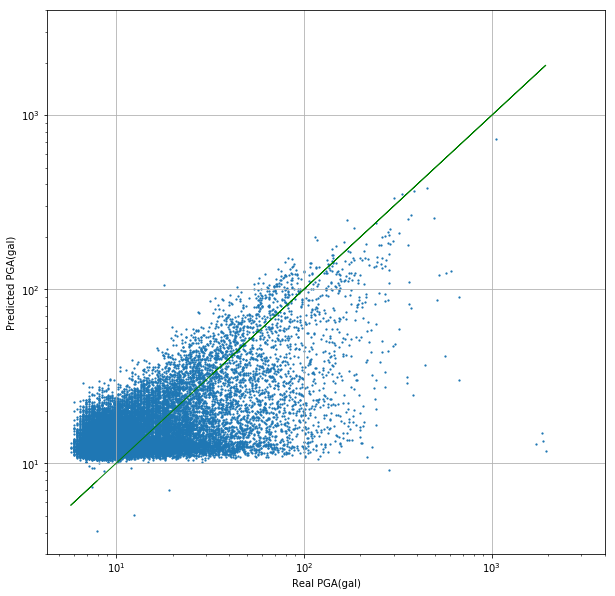

In [39]:
import matplotlib.pyplot as plt
x=ytest
y=yfit
plt.figure(figsize=(10,10))
plt.scatter(x,y, s=1.5,alpha=1)
plt.plot(x,x,color='green', linewidth=1.0)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0,4000)
plt.ylim(0,4000)
plt.xlabel('Real PGA(gal)')
plt.ylabel('Predicted PGA(gal)')
plt.grid()
plt.savefig('G:/學校相關作業/人工智慧/期末報告_預測加速度/10and1510_rmse30.105326.png', dpi=100)

In [40]:
np.savetxt('G:/學校相關作業/人工智慧/期末報告_預測加速度/10and1510_rmse30.105326.csv',ytest, delimiter = ',') 

In [41]:
np.savetxt('G:/學校相關作業/人工智慧/期末報告_預測加速度/10and1509_rmse3XXXXXX.csv',yfit, delimiter = ',') 

In [ ]:
'''
跑模型並且將RMSE儲存入excel中
import xlwt
from keras.callbacks import EarlyStopping
earlyStopping=EarlyStopping( monitor = 'val_loss', patience = 3)
book = xlwt.Workbook(encoding='utf-8', style_compression=0)
sheet = book.add_sheet('單層5test', cell_overwrite_ok=True)

for i in range(0,10):
    model = Sequential()
    model.add(Dense(15, activation = 'relu', input_dim = 6))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    model.fit(Xtrain, ytrain, epochs=110)
    
    yfit = model.predict(Xtest)
    RMSE=np.sqrt(metrics.mean_squared_error(ytest,yfit))
    sheet.write(i,0,RMSE)
    
book.save(r'G:/學校相關作業/人工智慧/期末報告_預測加速度/modle0.csv')
'''